### Confidence intervals (CIs)

A [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) is an estimate computed from observed data's statistics. It's a range of values we are fairly sure our true value lies within. For example, we can say: we are 99% certain (confidence *level*) that most of these datasets (confidence *intervals*) contain the true population parameter. According to the information available about the population, two tests can be performed to determine the CIs: the **z-test** or the **t-test**.


#### When to use the z-test and when to use the t-test?
Suppose that we consider a population of given mean and standard deviation (st.dev.), $\mu$ and $\sigma$, respectively, and we want to verify whether a sample of size $N$, mean $\hat{x}$ and st.dev. $s$ belong to/represent that population. Then:
- if both the  *population* mean and st.dev. are known, then one should perform a *z*-test
- if, instead, *only* the population mean is known, then one should use the *t*-test. 

This is because the *t*-distribution has heavier tails than the normal distribution (*z*-distribution) to compensate for the higher uncertainty caused by the lack of information about the (population) standard deviation. Unfortunately, it's very rare to know the population standard deviation, so the *t*-test is more commonly used.

It's possible to read that one test should be chosen over the other according to the sample size. Sometimes, it's said that when the sample size is $N\geq30$, only the *z*-test should be used. However, this is incorrect and the *t*-test can always be performed. Indeed, for large $N$ the two distributions become more and more similar and for $N\rightarrow\infty$ the *t*-distribution converges to the normal one (central limit theorem). 

#### The *z*-distribution and *t*-distribution
The expression of the normal or Gaussian distribution (PDF) of mean $\mu$ and st.dev. $\sigma$ is familiar. We report it here:\
$$
f(t) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(t-\mu)^2}{\sigma^2}}
$$

The *t*-Student one (PDF) is less common and depends on a parameter, called the number of degrees of freedom (dof), with symbol $\nu$: 
$$
f(t) = \frac{\ \Gamma\left(\frac{\ \nu+1\ }{ 2 }\right)\ }{\ \sqrt{\pi\ \nu\ }\ \Gamma\left(\frac{\nu}{2}\right)} \left(\ 1 + \frac{~ t^2\ }{ \nu }\ \right)^{-(\nu+1)/2}
$$


When performing statistical testing and determining the CI, it's important to know the cumulative distribution functions (CDFs) of the above PDFs since, as any CDF, they tell us information about the probability of a certain value $t$. Even give the probability associated to the value $t$. Even if the CDFs of the normal and *t*-distributions have analytical but complex expressions, the second also changing according to the different values of $\nu$, it's useless to report them here.

It's useful, instead, to remember the general properties of the CDFs. Given a real-valued random variable $X$, a CDF is a function $F$, such that $F \colon \mathbb R \rightarrow [0,1]$, satisfying $\lim_{x\rightarrow-\infty}F(x)=0$ and $\lim_{x\rightarrow\infty}F(x)=1$. Given a PDF, $f(t)$, its CDF is  
$$
F(t)\,=\,\int_{-\infty}^t f(u) \, du
$$
such that
$$
F_X(t)\,=\,P(X \leq t)
$$
for any random variable $X$.

#### Example 1: the population st.dev. is known
Suppose that we know the population distribution and that this distribution is $N(\mu=0, \sigma^2=1)$, i.e., the *standard* normal distribution. Suppose now that we measure a sample and this sample has mean $\hat x$. We want to know if this sample belongs to or population $N(0,1)$. The *z*-score is, then, defined as
$$
z_r = \frac{\hat x-\mu}{\sigma}
$$
and we want to see which is the probability associated to this value. We can look at the CDF of this distribution and (analytically or, more likely, numerically) solve the following integral to get the corresponding probability $r$:
$$
\text{CDF}(– z_r \leq Z \leq z_r ) = P(– z_r \leq Z \leq z_r) = \frac{1}{2\pi}\int_{-z_r}^{z_r}e^{-\frac{z^2}{2}} dz = r
$$

What is more common to do is the way round: (i) you measure $z_r$, (ii) you fix a target probability $r$ you want to achieve and (iii) you solve the integral to find the corresponding *z*-values. If $z_r\in [-z, z]$, then you can be $r$ confident about your estimate.

For example, under the normality assumption (i.e., the population distribution is $N(\mu, \sigma^2)$), it can be shown that

$$
0.95 = P\Big(- 1.96 \le \frac{\hat x - \mu}{\frac{\sigma}{\sqrt{n}}} \le 1.96 \Big)
$$

which is more commonly written as ($n$ is the sample size)

$$
0.95 = P\Big( \hat x - 1.96\cdot\frac{\sigma}{\sqrt{n}}\ \le \mu \le \ \hat x + 1.96\cdot\frac{\sigma}{\sqrt{n}} \Big)
$$

Thus, we can say that the 95% CI for $\mu$ when $\sigma$ is known is:

$$
\Big[\hat x - 1.96\cdot\frac{\sigma}{\sqrt{n}}\ ,\ \hat x + 1.96\cdot\frac{\sigma}{\sqrt{n}} \Big]
$$

More generally, if we define $z_{\alpha/2}$ as the value that cuts off an area of $\alpha/2$ in the upper tail of the standard normal distribution, we can define a ($1-\alpha$) confidence interval for the population mean $\mu$ as:

$$
\Big[\hat x - Z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}\ ,\ \hat x + Z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}} \Big]
$$  

##### z-score calculation in practice
To calculate $Z_{\alpha/2}$ for a 95% confidence interval we can use the `.interval()` function or the `.ppf()` function.

In [1]:
import scipy.stats as stats
import numpy as np

Let's say we want to have a confidence of 95% for our results, then $\alpha=0.05$ (5%). This means that we want to confirm the null hypotesis (for example, that $\hat{x}\approx\mu$) with a confidence of 95% (i.e., accepting an error of 5%). **Note** that here we are assuming that the population st.dev. $\sigma$ is known - this is rarely the case!

For the standard normal distribution:

In [2]:
r = .95
print(F"Confidence Interval: {stats.norm.interval(r)}")
print(f"Upper z-score:\t{stats.norm.ppf(1 - ((1 - r)/2)):.3f}") # ppf = percent point function
print(f"Lower z-score:\t{stats.norm.ppf((1 - r)/2):.3f}")

Confidence Interval: (-1.959963984540054, 1.959963984540054)
Upper z-score:	1.960
Lower z-score:	-1.960


Let's say now that we measured the mean and st.dev. for a data sample with the following results:
- $\hat{x}=135$ (sample mean)
- $s=25$ (sample st.dev.)
- $n=56$ (n. of samples)

We want to check that the mean ($\mu$) of the population this sample comes from is correctly approximated by $\hat{x}$. We allow an error of maximum 5%. Note the the underlying assumption is that the data is normally distributed and that we can safely say (because of some previous knowledge) that $s\approx\sigma$ is realistically true. Then:

In [3]:
x_hat = 135.
s = 25.
n = 56
alpha = .05 # \alpha = 1-r
zeta_alpha_half = stats.norm.ppf(1 - alpha/2)

print(f"CI(95%): {x_hat - zeta_alpha_half * s / np.sqrt(n), x_hat + zeta_alpha_half * s / np.sqrt(n)}")

CI(95%): (128.45221989235253, 141.54778010764747)


In [14]:
stats.norm.interval?

In [4]:
print(f'Calculation with .interval(): {stats.norm.interval(confidence=1-alpha, loc=x_hat, scale=s/np.sqrt(n))}')

Calculation with .interval(): (128.45221989235253, 141.54778010764747)


#### Example 2: the population st.dev. is *unknown*
Let's now move to the more common case when the population st.dev. $\sigma$ is unknown. In this case, we should prefer a *t*-score to a *z*-score and perform a *t*-test instead of a *z*-test. 

We can define the *t*-score as 
$$
\mu = \hat{x} \pm t_\nu \frac{s}{\sqrt{n}}
$$
*s* is now the sample mean and *t* depends on the degrees of freedom, $\nu$.

Note that, while the population and sample means are calculated in the same way, the population and sample variances are different:
$$
\hat{x}=\mu=\frac{\sum_i x_i}{N}
$$
but
$$
\sigma^2=\frac{\sum_i (x_i-\mu)^2}{N} \\
s^2=\frac{\sum_i (x_i-\hat{x})^2}{N-1}
$$

This will be taken into account when calculating the *z*- and *t*-scores.

In `scipy.stats`, the `t` and `norm` libraries are similar, besides the fact that the former needs the *degrees of freedom* (dof) to be specified. Remember that $\text{dof} = N-1$, where $N$ is the number of samples in the dataset. Let's take a real-case example: a dataset that contains the body temperature (Fahrenheit), heart rate (bpm) and sex (male/female) for a given population.

In [5]:
import scipy.stats as stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(5,5)})

In [6]:
body = pd.read_csv('data/bodytemp.csv')
body.head()

,temp,sex,bpm
0,96.3,0,70
1,96.7,0,71
2,96.9,0,74
3,97.0,0,80
4,97.1,0,73


In [7]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    130 non-null    float64
 1   sex     130 non-null    int64  
 2   bpm     130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


N. of records: 65


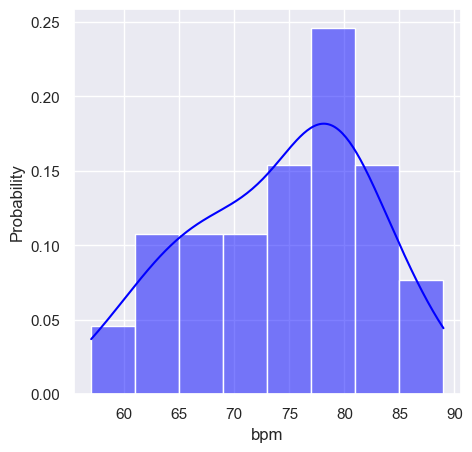

In [8]:
female_hr = body[body.sex == 1]['bpm'] # let's look at the female (sex=1) population
print(f"N. of records: {len(female_hr)}")
sns.histplot(female_hr, color='blue', kde=True, stat='probability')
plt.show()

In [9]:
# sample statistics
n = len(female_hr)          # n. of samples
x_hat = female_hr.mean()    # sample mean
std_dev = female_hr.std()   # sample st.dev.
print(f"N. of Samples:\t{n}\nSample Mean:\t{x_hat:.1f}\nSample St.Dev:\t{std_dev:.1f}")

N. of Samples:	65
Sample Mean:	74.2
Sample St.Dev:	8.1


In [13]:
# Calculating CIs from z- and t- scores
alpha = 0.05 # 1-r
print(f'{1-alpha:.0%} Confidence Interval from z-test: {stats.norm.interval(confidence=alpha, loc=np.mean(female_hr), scale=stats.sem(female_hr))}')
print(f'{1-alpha:.0%} Confidence Interval from t-test: {stats.t.interval(confidence=alpha, df=len(female_hr)-1, loc=np.mean(female_hr), scale=stats.sem(female_hr))}')

95% Confidence Interval from z-test: (74.0908051655888, 74.21688714210352)
95% Confidence Interval from t-test: (74.09055746175093, 74.21713484594139)


We can see that the CIs found with the two tests are very similar. Indeed, when $N\rightarrow\infty$, the *t*-distribution converges to the *z*-distribution. We'll use this information in the next notebook.